In [22]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data/Demand_History.csv')

In [4]:
data.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563


In [7]:
useful=data.iloc[:,2:-1]
target=data.iloc[:,-1]

In [8]:
target.head()

0    13.119572
1    12.020091
2    14.018254
3    15.012302
4    16.355563
Name: 2018, dtype: float64

In [9]:
model=XGBRegressor()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_teat=train_test_split(useful,target,test_size=0.2,random_state=0)

In [12]:
x_train.head()

,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017
1567,24.5,4.758661,10.221852,17.206054,48.796023,82.330578,100.654924,137.055623,187.383144
720,11.5,0.915202,1.651770,3.478303,9.169662,18.171531,26.636035,33.737533,36.981876
1093,17.5,0.935880,1.783338,3.065736,9.309703,15.945118,19.112641,28.309326,37.298182
2331,36.5,5.455725,14.553831,26.617069,60.924314,102.013592,131.905567,180.986655,283.545029
1276,19.5,0.034131,0.066490,0.216590,0.709840,0.959995,1.263077,1.589105,1.869413


In [13]:

model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [16]:
y_pred=model.predict(x_test)

In [17]:
y_pred.shape

(820,)

In [20]:
r2_score(y_true=y_teat,y_pred=y_pred)

0.9887906003968623

In [25]:
y_pred.shape

(820,)

In [26]:
y_teat.shape

(820,)

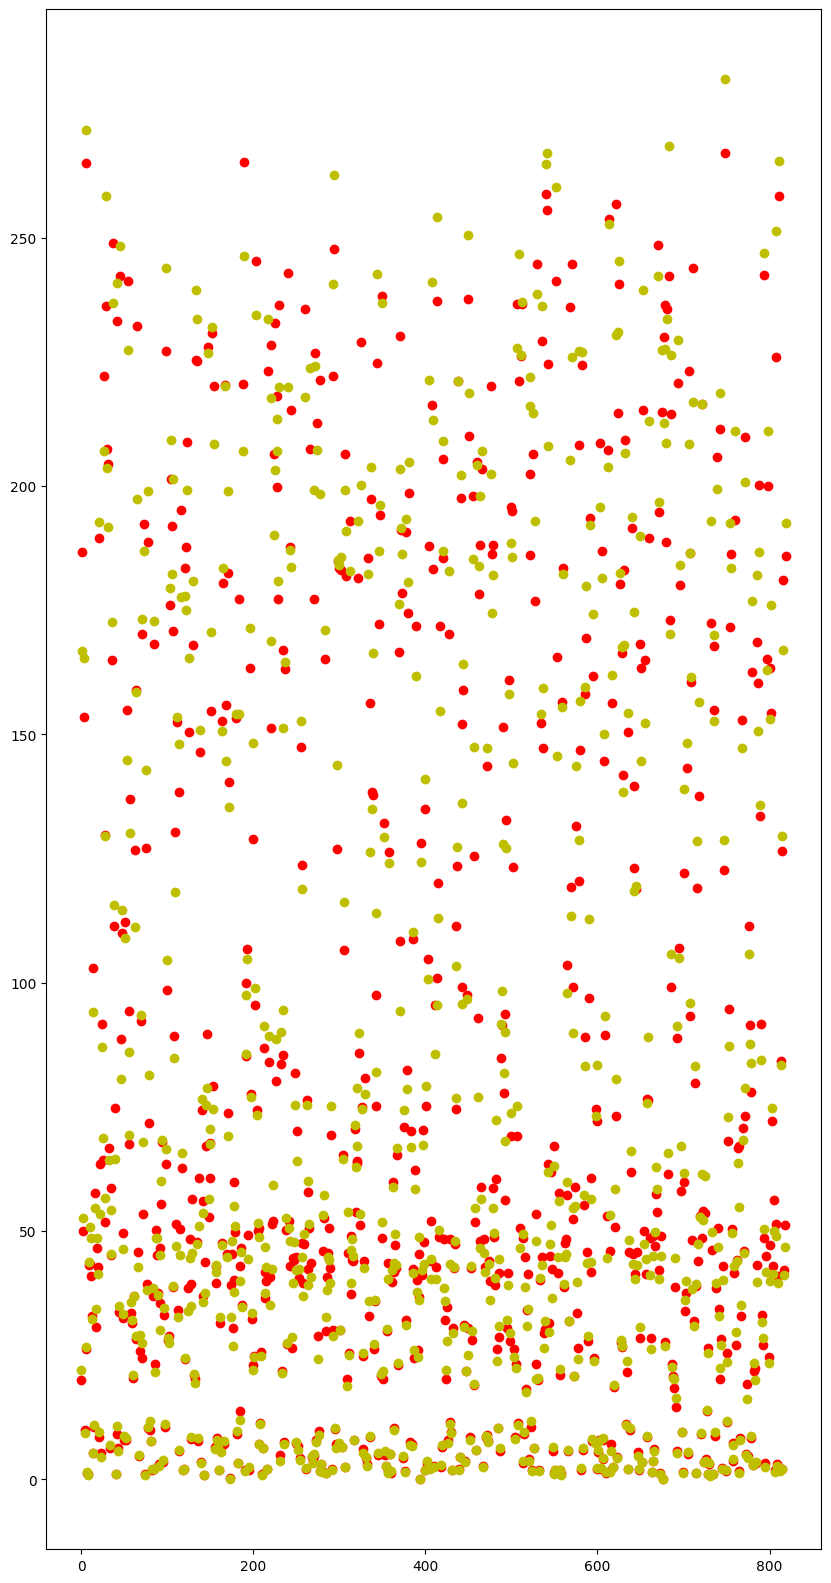

In [24]:
a=np.arange(0,y_pred.shape[0])
plt.figure(figsize=(10,20))
plt.scatter(a,y_pred,label='predicted_value',c='r')
plt.scatter(a,y_teat,label='predicted_value',c='y')

In [30]:
useful=data.iloc[:,3:]
y_2019=model.predict(useful)

In [31]:
data["2019"]=y_2019

In [34]:
data.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572,18.078848
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091,17.896994
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254,19.012815
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302,19.590612
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563,19.400734


In [37]:
y_2020=model.predict(data.iloc[:,4:])


In [38]:
data["2020"]=y_2020

In [39]:
data.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572,18.078848,20.776148
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091,17.896994,20.751341
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254,19.012815,20.919231
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302,19.590612,22.982687
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563,19.400734,23.674410


In [40]:
data.to_csv("isme 2019,2020 ka forcast hai.csv",index=False)